In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from data_processing import download_data, process_data, Location_dict
from preprocessing import calculate_peths
from brainbox import processing

from one.api import ONE
one = ONE(password='international')

In [102]:
import curbd
import pylab

from sklearn.decomposition import PCA

In [125]:
def preprocess_binned_spikes(binned_spikes):
    processed_spikes = binned_spikes.copy()
    std_firing_rate = np.std(processed_spikes, axis=2, keepdims=True)
    #mean_firing_rate = np.mean(processed_spikes, axis=1, keepdims=True)
    
    normalized_spikes = (processed_spikes) / (std_firing_rate + 1e-16)
    
    return normalized_spikes

In [126]:
def LoadingRegionIndex(partial_key, Location_dict, spikes, clusters, channels):
    
    partial_key = partial_key
    matching_key = [key for key in Location_dict if partial_key in key]
    matching_value = [Location_dict[key] for key in matching_key]
    
    units_b = processing.get_units_bunch(spikes)
    T = spikes['times'][-1] - spikes['times'][0]
    filter_units = processing.filter_units(units_b, T, min_amp=0, min_fr=1)
    cluster_ids = filter_units
    clusters_locationIDs = channels['brainLocationIds_ccf_2017'][clusters.channels]
    spike_locationIDs = clusters_locationIDs[filter_units]

    ##########################################
    mask = np.isin(spike_locationIDs, matching_value)
    filter_units_filtered = filter_units[mask]
    ##########################################
    
    return filter_units_filtered

In [127]:
eid = 'ebe2efe3-e8a1-451a-8947-76ef42427cc9'

spikes, clusters, channels, trials, wheel, wheelMoves, left_video_features, right_video_features,  = download_data(eid)
trial_table = process_data(eid, spikes, trials)
trial_table

Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing trials data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing wheel data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing wheelMove data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing left_video data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing right_video data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)


,stimOn_times,firstMovement_times,feedbackType,feedback_times,probabilityLeft,choice,goCue_times,response_times,intervals,contrast
0,114.398075,114.485784,1.0,114.721404,0.5,-1.0,114.398939,114.721318,"[113.91932080397669, 116.29751579099293]",0.1250
1,117.190245,117.349784,1.0,117.44119,0.5,1.0,117.191205,117.441119,"[116.68221149481644, 119.01443723201541]",-0.2500
2,119.956784,120.108784,1.0,120.523282,0.5,-1.0,119.957936,120.523155,"[119.40343802443923, 122.09008281496813]",1.0000
3,123.031292,123.194784,-1.0,123.423166,0.5,-1.0,123.032252,123.422297,"[122.48418594520847, 125.99003128233156]",0.0000
4,127.680398,127.790784,-1.0,132.531873,0.5,1.0,127.68155,132.531065,"[126.38343303311112, 135.0900801403311]",0.0000
...,...,...,...,...,...,...,...,...,...,...
655,3070.384585,3070.436784,1.0,3070.653386,0.8,1.0,3070.385641,3070.653292,"[3069.8277825144146, 3072.2186140590443]",-0.0625
656,3075.82771,3075.951784,1.0,3076.146911,0.8,-1.0,3075.828574,3076.146841,"[3073.297523940371, 3077.6944535757843]",0.2500
657,3079.267979,3079.363784,1.0,3079.553964,0.8,1.0,3079.268939,3079.553852,"[3078.7812571593477, 3081.1111445174743]",-0.1250
658,3082.752025,3082.851784,1.0,3083.287707,0.8,1.0,3082.752889,3083.287527,"[3082.1829343219333, 3084.868919289372]",-0.2500


# Loading Multi-session trial data

Loading BrainLocationIDs from Allen Brain Common Framework

In [128]:
partial_key = 'MO'
matching_key = [key for key in Location_dict if partial_key in key]
matching_value = [Location_dict[key] for key in matching_key]
print('Matching keys: ', matching_key)
print('Matching values: ', matching_value)

Matching keys:  ['MOs5', 'MOs2/3', 'MOs6a', 'MOp5', 'MOp6a', 'MOp6b', 'MOp2/3', 'MOs1']
Matching values:  [767, 962, 1021, 648, 844, 882, 943, 656]


In [129]:
units_b = processing.get_units_bunch(spikes)
T = spikes['times'][-1] - spikes['times'][0]
filter_units = processing.filter_units(units_b, T, min_amp=0, min_fr=1)
cluster_ids = filter_units
clusters_locationIDs = channels['brainLocationIds_ccf_2017'][clusters.channels]
spike_locationIDs = clusters_locationIDs[filter_units]

##########################################
mask = np.isin(spike_locationIDs, matching_value)
filter_units_filtered = filter_units[mask]
##########################################


# Calculate the peth bins aligned to stimulus onset and movement onset
stimOn_time = trial_table['stimOn_times']
contrast = trial_table['contrast']
visual_peth, visual_binned_spike = calculate_peths(
        spikes.times, spikes.clusters, filter_units_filtered, align_times = stimOn_time, pre_time=0.1,
        post_time=0.1, bin_size=0.02, smoothing=0.2, return_fr=True)

normalized_spike = preprocess_binned_spikes(visual_binned_spike)




## Loading multiple sessions

In [130]:
eids = ['ebe2efe3-e8a1-451a-8947-76ef42427cc9', 
        '8c33abef-3d3e-4d42-9f27-445e9def08f9',
        'aad23144-0e52-4eac-80c5-c4ee2decb198',
        'c7bd79c9-c47e-4ea5-aea3-74dda991b48e',
        '5d01d14e-aced-4465-8f8e-9a1c674f62ec',
        '5d01d14e-aced-4465-8f8e-9a1c674f62ec',
        #'8207abc6-6b23-4762-92b4-82e05bed5143',  
        ]

## Loading region 

In [131]:
# Trial Parameters
pre_time = 0.2
post_time = 0.8
bin_size = 0.01
smoothing = 0.3

# Define lists of regional data
MO_binned_spikes = []
STR_binned_spikes = []
CP_binned_spikes = []

# Loop through eids
for eid in eids:
        spikes, clusters, channels, trials, _, _, _, _,  = download_data(eid)
        trial_table = process_data(eid, spikes, trials)
        stimOn_time = trial_table['firstMovement_times']

        MO_index = LoadingRegionIndex('MO', Location_dict, spikes, clusters, channels)
        STR_index = LoadingRegionIndex('STR', Location_dict, spikes, clusters, channels)
        CP_index = LoadingRegionIndex('CP', Location_dict, spikes, clusters, channels)

        MO_peth, MO_binned_spike = calculate_peths(
                spikes.times, spikes.clusters, MO_index, align_times = stimOn_time, pre_time=pre_time,
                post_time=post_time, bin_size=bin_size, smoothing=smoothing, return_fr=True)

        STR_peth, STR_binned_spike = calculate_peths(
        spikes.times, spikes.clusters, STR_index, align_times = stimOn_time, pre_time=pre_time,
        post_time=post_time, bin_size=bin_size, smoothing=smoothing, return_fr=True)
        
        CP_peth, CP_binned_spike = calculate_peths(
        spikes.times, spikes.clusters, CP_index, align_times = stimOn_time, pre_time=pre_time,
        post_time=post_time, bin_size=bin_size, smoothing=smoothing, return_fr=True)
        
        MO_binned_spikes.append(preprocess_binned_spikes(MO_binned_spike))
        STR_binned_spikes.append(preprocess_binned_spikes(STR_binned_spike))
        CP_binned_spikes.append(preprocess_binned_spikes(CP_binned_spike))


Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing spikes data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing trials data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing wheel data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing wheelMove data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing left_video data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9
Loading existing right_video data for experiment ID: ebe2efe3-e8a1-451a-8947-76ef42427cc9


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)


Loading existing spikes data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing spikes data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing spikes data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing trials data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing wheel data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing wheelMove data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing left_video data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9
Loading existing right_video data for experiment ID: 8c33abef-3d3e-4d42-9f27-445e9def08f9


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)


Loading existing spikes data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing spikes data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing spikes data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing trials data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing wheel data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing wheelMove data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing left_video data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198
Loading existing right_video data for experiment ID: aad23144-0e52-4eac-80c5-c4ee2decb198


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)
/opt/anaconda3/envs/pytorch3/lib/python3.9/site-packages/brainbox/processing.py:307: RuntimeWarning: divide by zero encountered in scalar divide
  fr = np.asarray([len(units_b.amps[unit]) /


Loading existing spikes data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing spikes data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing spikes data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing trials data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing wheel data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing wheelMove data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing left_video data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e
Loading existing right_video data for experiment ID: c7bd79c9-c47e-4ea5-aea3-74dda991b48e


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)


Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing trials data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing wheel data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing wheelMove data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing left_video data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing right_video data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)
/opt/anaconda3/envs/pytorch3/lib/python3.9/site-packages/brainbox/processing.py:307: RuntimeWarning: divide by zero encountered in scalar divide
  fr = np.asarray([len(units_b.amps[unit]) /


Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing spikes data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing trials data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing wheel data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing wheelMove data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing left_video data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec
Loading existing right_video data for experiment ID: 5d01d14e-aced-4465-8f8e-9a1c674f62ec


/Users/qianjiaming/CURBD/data_processing.py:158: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastRight'] = data['contrastRight'].fillna(0)
/Users/qianjiaming/CURBD/data_processing.py:159: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['contrastLeft'] = data['contrastLeft'].fillna(0)
/opt/anaconda3/envs/pytorch3/lib/python3.9/site-packages/brainbox/processing.py:307: RuntimeWarning: divide by zero encountered in scalar divide
  fr = np.asarray([len(units_b.amps[unit]) /


## TRy with averaged trial activity

In [132]:
STR_averaged = np.concatenate([np.mean(STR_binned_spike, axis=0) for STR_binned_spike in STR_binned_spikes])[0:80, :]
MO_averaged = np.concatenate([np.mean(MO_binned_spike, axis=0) for MO_binned_spike in MO_binned_spikes])[0:80, :]
CP_averaged = np.concatenate([np.mean(CP_binned_spike, axis=0) for CP_binned_spike in CP_binned_spikes])[0:80, :]

## Figure 1. Activity patterns in the STR dataset

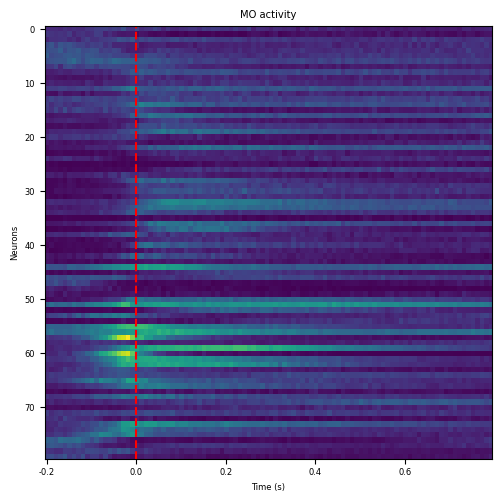

In [133]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(MO_averaged, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
xticks = np.arange(0, 100, interval)
xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('MO activity')

plt.tight_layout()

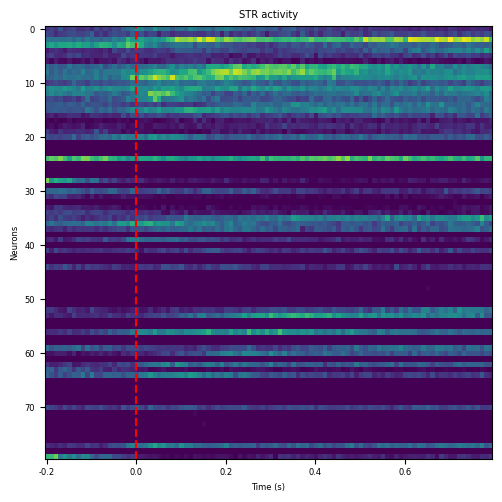

In [134]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(STR_averaged, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
xticks = np.arange(0, 100, interval)
xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('STR activity')

plt.tight_layout()

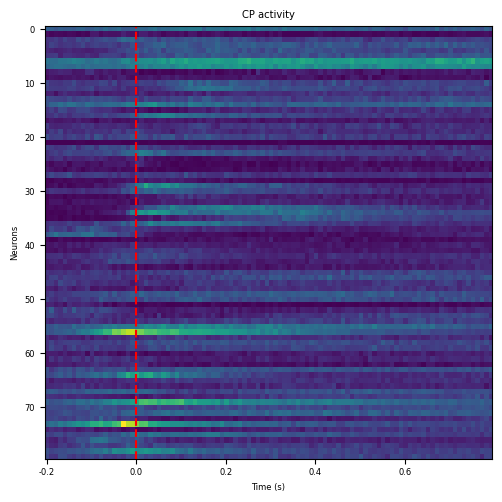

In [135]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(CP_averaged, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
xticks = np.arange(0, 100, interval)
xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('CP activity')

plt.tight_layout()

In [136]:
pca = PCA(n_components=5)

pca.fit(MO_averaged.T)
MO_varExp = pca.explained_variance_ratio_
MO_PCs = pca.transform(MO_averaged.T)

pca.fit(STR_averaged.T)
STR_varExp = pca.explained_variance_ratio_
STR_PCs = pca.transform(STR_averaged.T)

pca.fit(CP_averaged.T)
CP_varExp = pca.explained_variance_ratio_
CP_PCs = pca.transform(CP_averaged.T)

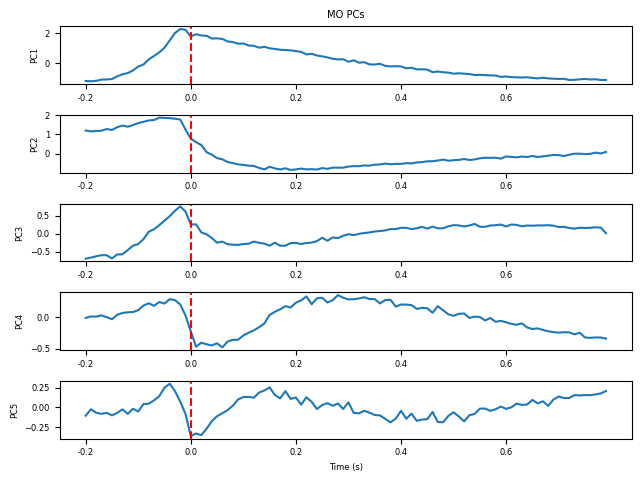

In [137]:
fig, axs = plt.subplots(5,1)

for i in range(5):
    axs[i].plot(MO_PCs.T[i, :])
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticklabels)
    axs[i].axvline(x=20, c='r', linestyle='--')
    axs[i].set_ylabel(f'PC{i+1}')
    
axs[0].set_title('MO PCs')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()

Text(0.5, 1.0, 'MO')

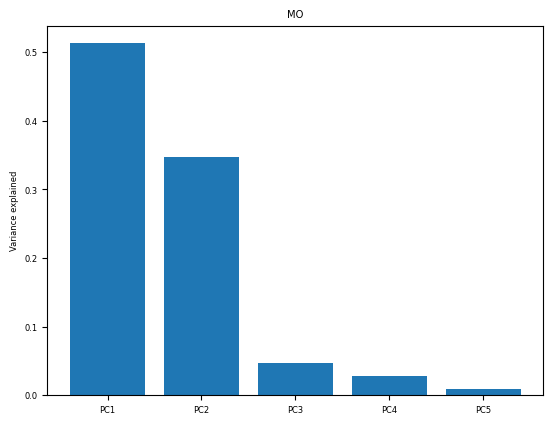

In [138]:
fig, ax = plt.subplots()

x = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax.bar(x, height=MO_varExp)

ax.set_ylabel('Variance explained')
ax.set_title('MO')

Text(0.5, 1.0, 'MO')

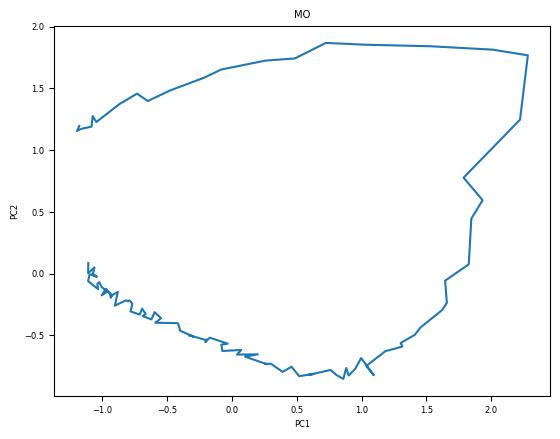

In [139]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(MO_PCs.T[0, :], MO_PCs.T[1, :])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('MO')

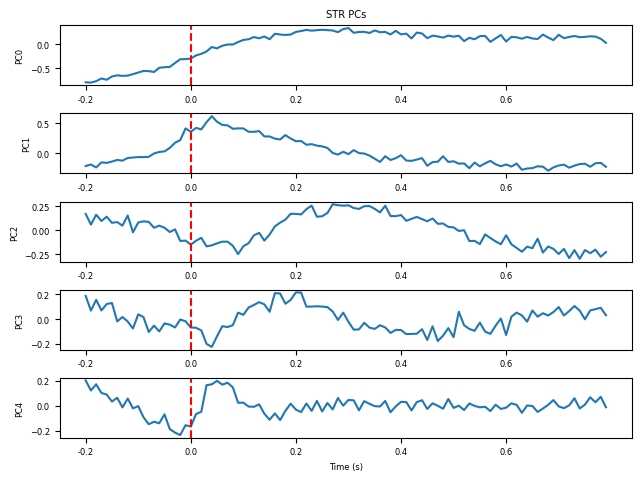

In [140]:
fig, axs = plt.subplots(5,1)

for i in range(5):
    axs[i].plot(STR_PCs.T[i, :])
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticklabels)
    axs[i].axvline(x=20, c='r', linestyle='--')
    axs[i].set_ylabel(f'PC{i}')
    
axs[0].set_title('STR PCs')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()

Text(0.5, 1.0, 'STR')

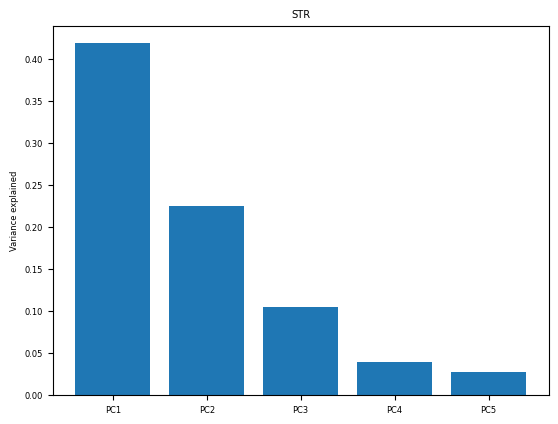

In [141]:
fig, ax = plt.subplots()

x = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax.bar(x, height=STR_varExp)

ax.set_ylabel('Variance explained')
ax.set_title('STR')

Text(0.5, 0, 'PC3')

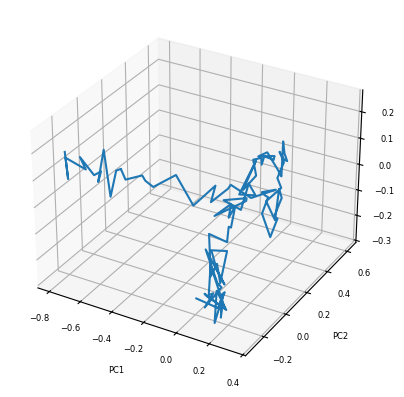

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(STR_PCs.T[0, :], STR_PCs.T[1, :],  STR_PCs.T[2, :])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Text(0.5, 1.0, 'STR')

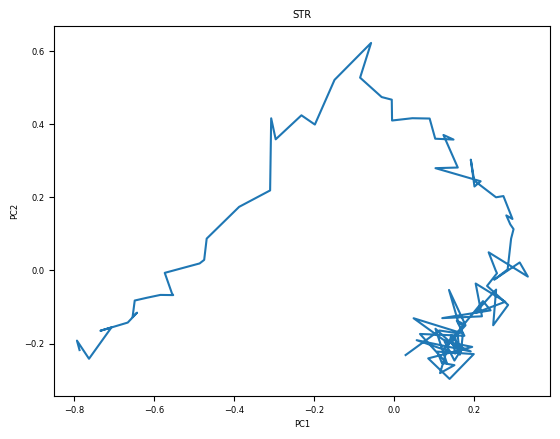

In [143]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(STR_PCs.T[0, :], STR_PCs.T[1, :])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('STR')

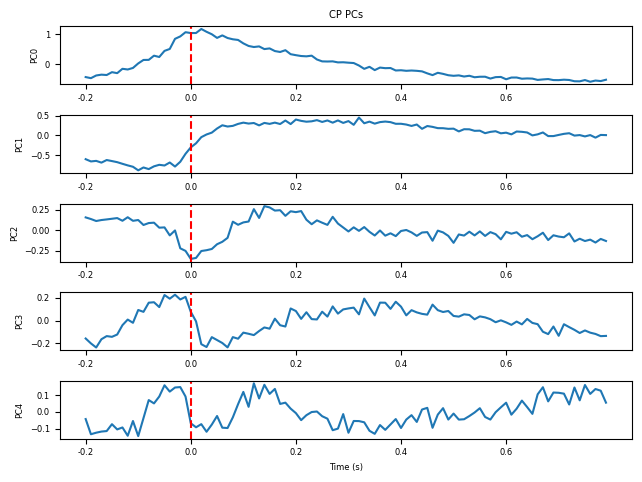

In [144]:
fig, axs = plt.subplots(5,1)

for i in range(5):
    axs[i].plot(CP_PCs.T[i, :])
    axs[i].set_xticks(xticks)
    axs[i].set_xticklabels(xticklabels)
    axs[i].axvline(x=20, c='r', linestyle='--')
    axs[i].set_ylabel(f'PC{i}')
    
axs[0].set_title('CP PCs')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()

Text(0.5, 1.0, 'CP')

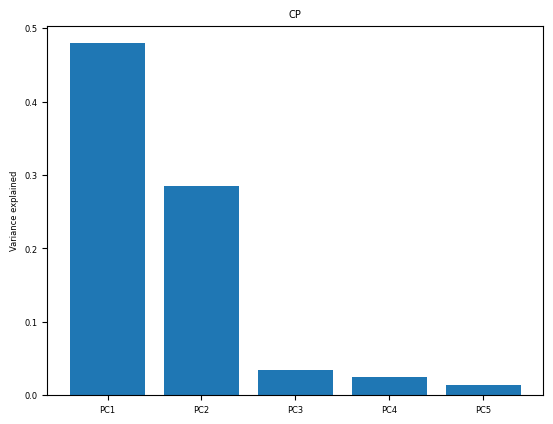

In [145]:
fig, ax = plt.subplots()

x = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
ax.bar(x, height=CP_varExp)

ax.set_ylabel('Variance explained')
ax.set_title('CP')

Text(0.5, 1.0, 'CP')

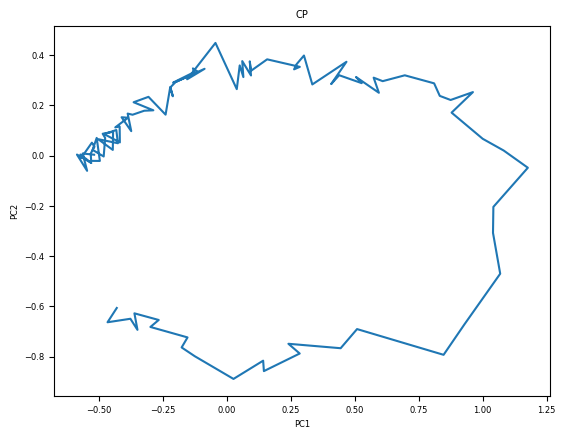

In [146]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(CP_PCs.T[0, :], CP_PCs.T[1, :])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('CP')

## Model Training

In [147]:
MO_region_index = np.arange(0, MO_averaged.shape[0], 1)
STR_region_index = np.arange(0, STR_averaged.shape[0], 1)
CP_region_index = np.arange(0, CP_averaged.shape[0], 1)

In [148]:
# Combine the total activity array
activity = np.concatenate([MO_averaged, STR_averaged, CP_averaged], axis=0)

# Assign the timestep 
dtData = 0.02

# Create the region info array
regions = np.array([['MO', MO_region_index], ['STR', STR_region_index + MO_region_index[-1] +1], ['CP', CP_region_index + STR_region_index[-1] + MO_region_index[-1] +2]], dtype=object)

In [149]:
regions

array([['MO',
        array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
               17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
               34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
               51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
               68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79])                   ],
       ['STR',
        array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
                93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
               106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
               119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
               132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
               145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
               158, 159])                                                 

In [150]:
activity.shape

(240, 100)

## Training the network

trial=0 pVar=0.522340 chi2=0.504379


/Users/qianjiaming/CURBD/curbd.py:204: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


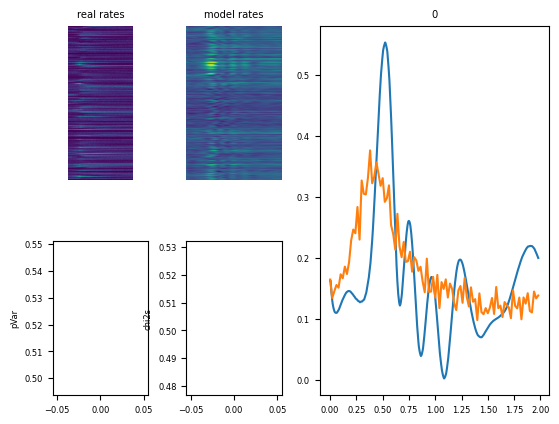

trial=1 pVar=0.835147 chi2=0.172212
trial=2 pVar=0.891328 chi2=0.120211
trial=3 pVar=0.918781 chi2=0.089565
trial=4 pVar=0.912867 chi2=0.095064
trial=5 pVar=0.935266 chi2=0.073467
trial=6 pVar=0.938314 chi2=0.068769
trial=7 pVar=0.945235 chi2=0.060219
trial=8 pVar=0.948481 chi2=0.055711
trial=9 pVar=0.950587 chi2=0.052682
trial=10 pVar=0.951909 chi2=0.050738
trial=11 pVar=0.952836 chi2=0.049397
trial=12 pVar=0.953585 chi2=0.048368
trial=13 pVar=0.954249 chi2=0.047505
trial=14 pVar=0.954853 chi2=0.046748
trial=15 pVar=0.955406 chi2=0.046068
trial=16 pVar=0.955915 chi2=0.045445
trial=17 pVar=0.956389 chi2=0.044863
trial=18 pVar=0.956833 chi2=0.044310
trial=19 pVar=0.957254 chi2=0.043780
trial=20 pVar=0.957652 chi2=0.043270
trial=21 pVar=0.958032 chi2=0.042777
trial=22 pVar=0.958393 chi2=0.042302
trial=23 pVar=0.958738 chi2=0.041845
trial=24 pVar=0.959068 chi2=0.041404
trial=25 pVar=0.959385 chi2=0.040980
trial=26 pVar=0.959688 chi2=0.040573
trial=27 pVar=0.959980 chi2=0.040182
trial=28 p

In [151]:
model = curbd.trainMultiRegionRNN(activity,
                                  dtData=dtData,
                                  dtFactor=5,
                                  regions=regions,
                                  tauRNN=2*0.1/2,
                                  nRunTrain=500,
                                  verbose=True,
                                  nRunFree=5)



In [170]:
MO_model_rate = model['RNN'][regions[0, 1]]
STR_model_rate = model['RNN'][regions[1, 1]]
CP_model_rate = model['RNN'][regions[2, 1]]

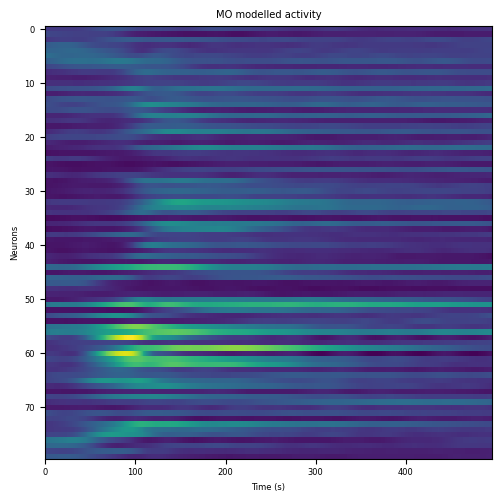

In [173]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(MO_model_rate, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
#xticks = np.arange(0, 100, interval)
#xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)
#ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('MO modelled activity')

plt.tight_layout()

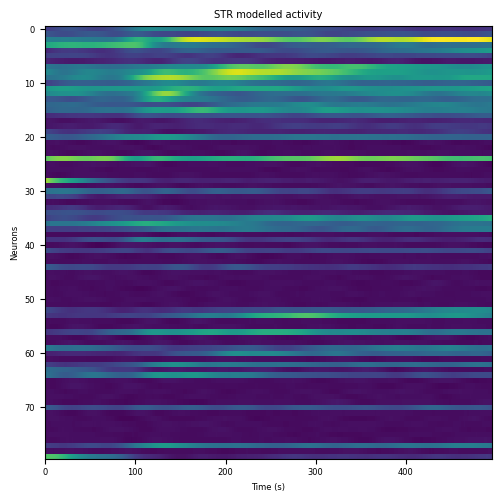

In [174]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(STR_model_rate, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
#xticks = np.arange(0, 100, interval)
#xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)
#ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('STR modelled activity')

plt.tight_layout()

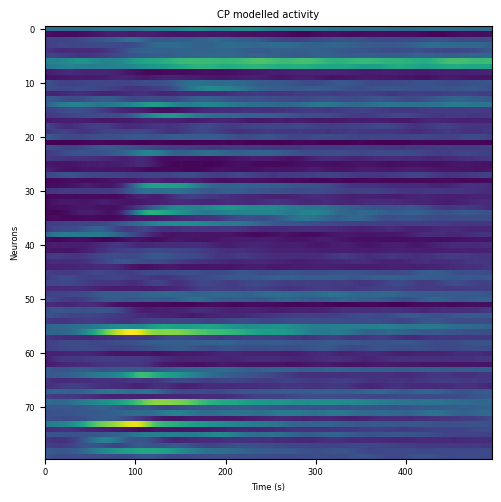

In [175]:
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(CP_model_rate, aspect='auto', cmap='viridis', interpolation='nearest')

interval = 20
#xticks = np.arange(0, 100, interval)
#xticklabels = np.arange(-pre_time, post_time, bin_size*interval).round(1)

#ax.set_xticks(xticks)
#ax.set_xticklabels(xticklabels)
#ax.axvline(x=20, c='r', linestyle='--')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Neurons')
ax.set_title('CP modelled activity')

plt.tight_layout()

## Compare the PC from modelled data and the actual data

In [176]:
pca.fit(MO_model_rate.T)
MO_model_varExp = pca.explained_variance_ratio_
MO_model_PCs = pca.transform(MO_model_rate.T)

pca.fit(STR_model_rate.T)
STR_model_varExp = pca.explained_variance_ratio_
STR_model_PCs = pca.transform(STR_model_rate.T)

pca.fit(CP_model_rate.T)
CP_model_varExp = pca.explained_variance_ratio_
CP_model_PCs = pca.transform(CP_model_rate.T)

Text(0.5, 1.0, 'MO')

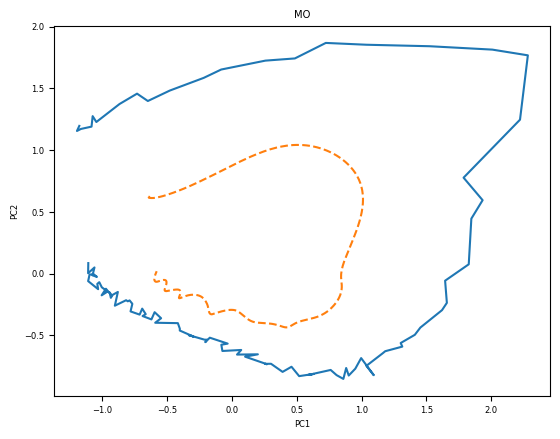

In [178]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(MO_PCs.T[0, :], MO_PCs.T[1, :])
ax.plot(MO_model_PCs.T[0, :], MO_model_PCs.T[1, :], linestyle='--')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('MO')

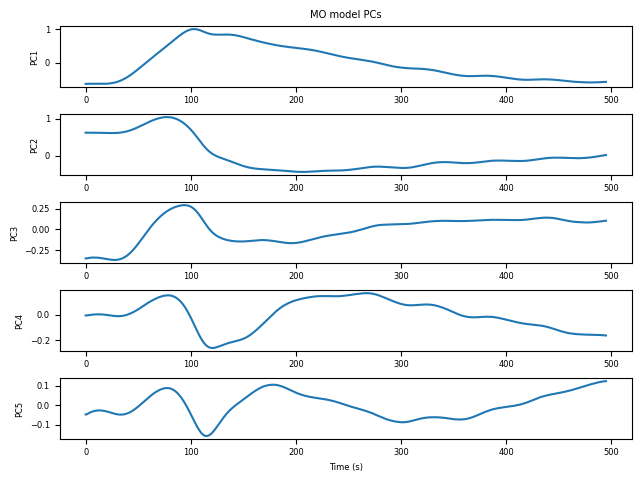

In [184]:
fig, axs = plt.subplots(5,1)

for i in range(5):
    axs[i].plot(MO_model_PCs.T[i, :])
    #axs[i].set_xticks(xticks)
    #axs[i].set_xticklabels(xticklabels)
    #axs[i].axvline(x=20, c='r', linestyle='--')
    axs[i].set_ylabel(f'PC{i+1}')
    
axs[0].set_title('MO model PCs')
axs[-1].set_xlabel('Time (s)')

plt.tight_layout()

Text(0.5, 1.0, 'STR')

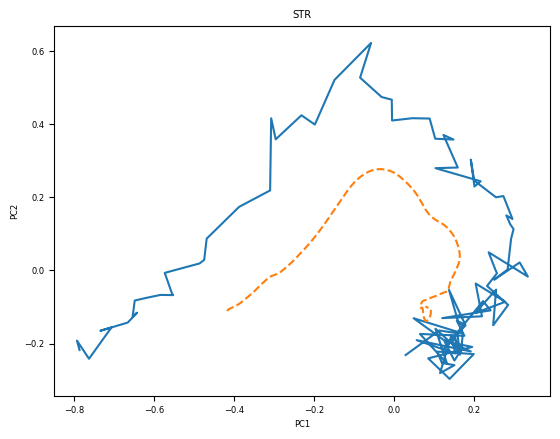

In [181]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(STR_PCs.T[0, :], STR_PCs.T[1, :])
ax.plot(STR_model_PCs.T[0, :], STR_model_PCs.T[1, :], linestyle='--')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('STR')

Text(0.5, 1.0, 'CP')

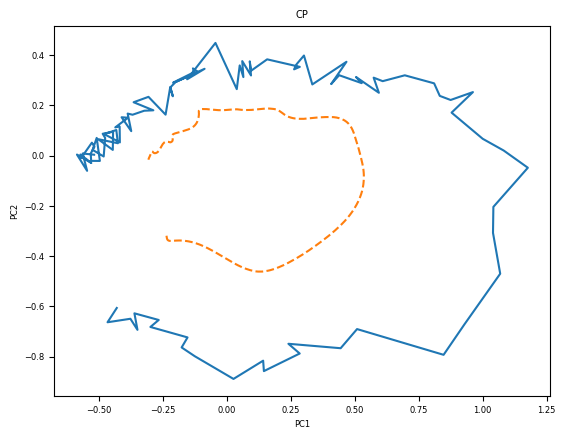

In [182]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(CP_PCs.T[0, :], CP_PCs.T[1, :])
ax.plot(CP_model_PCs.T[0, :], CP_model_PCs.T[1, :], linestyle='--')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('CP')

## CURBD 

/var/folders/0c/d7d1pr097f1cvqfjjkt6t4xm0000gn/T/ipykernel_98688/599831415.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


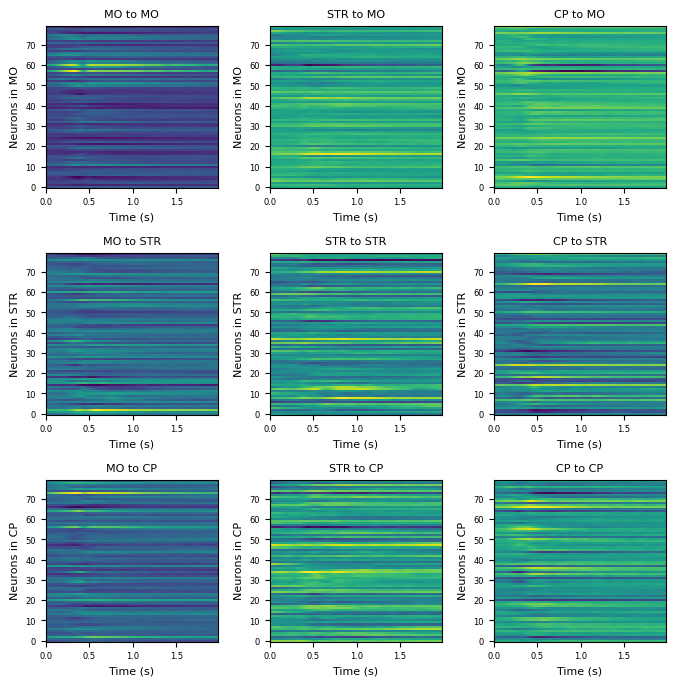

In [153]:
[curbd_arr, curbd_labels] = curbd.computeCURBD(model)

n_regions = curbd_arr.shape[0]
n_region_units = curbd_arr[0, 0].shape[0]

fig = pylab.figure(figsize=[8, 8])
count = 1
for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = fig.add_subplot(n_regions, n_regions, count)
        count += 1
        axn.pcolormesh(model['tRNN'], range(n_region_units),
                       curbd_arr[iTarget, iSource])
        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Neurons in {}'.format(regions[iTarget, 0]))
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.show()

In [155]:
model['tRNN'].shape

(496,)